### <font color = 'red'> Class 23. Simple Linear Regression

#### 1.1 Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


#### 1.2 Data Cleaning

In [6]:
penguins.shape

(344, 7)

In [7]:
penguins.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [8]:
# keep only adelie and gentoo species
penguins_sub = penguins[penguins['species'] != 'Chinstrap']
penguins_final = penguins_sub.dropna()
penguins_final.reset_index(inplace = True, drop = True)

#### 1.3 Exploratory data analysis

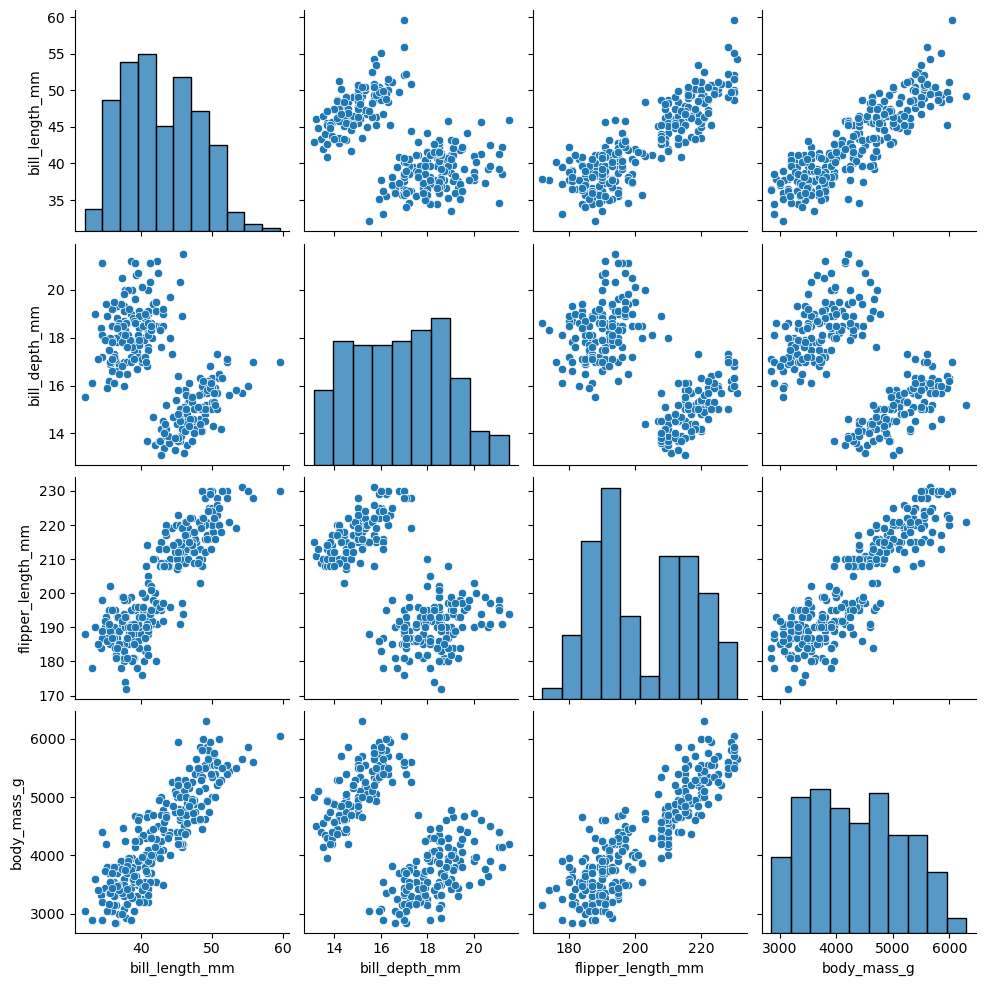

In [10]:
sns.pairplot(penguins_final)

#### 1.4 Model Construction

In [12]:
# here we construct a model between bill length and body mass. first we create a subset data from the df by using [[]] 
ols_data = penguins_final[['bill_length_mm','body_mass_g']]

In [13]:
# write the formula for SLR where y comes before ~ and x comes after ~
ols_formula = 'body_mass_g ~ bill_length_mm'

In [14]:
# we can build the slr model in statsmodels using old() fxn
from statsmodels.formula.api import ols
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     874.3
Date:                Wed, 21 Aug 2024   Prob (F-statistic):           1.33e-85
Time:                        08:06:02   Log-Likelihood:                -1965.8
No. Observations:                 265   AIC:                             3936.
Df Residuals:                     263   BIC:                             3943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1707.2919    205.640     -8.302      0.000   -2112.202   -1302.382
bill_length_mm   141.1904      4.775     29.569      0.000     131.788     150.592
==============================================================================
Omnibus:                        2.060   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                2.103
Skew:                           0.210   Prob(JB):                        0.349
Kurtosis:                       2.882   Cond. No.                         357.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

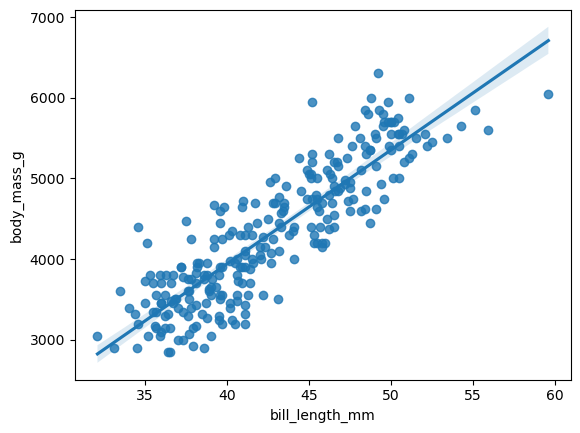

In [16]:
# we use regplot from seaborn to visualize the regression line
sns.regplot(x = 'bill_length_mm',y = 'body_mass_g',data = ols_data)

#### 1.5 Finish checking model assumptions

In [18]:
# subset X 
X = ols_data['bill_length_mm']
# get predictions from model
fitted_values = model.predict(X)

In [19]:
#calculate residuals
residuals = model.resid

#### 1.6 Check normality assumptions

<function matplotlib.pyplot.show(close=None, block=None)>

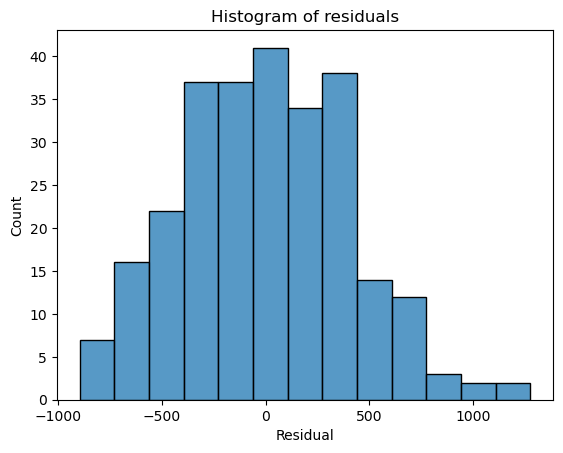

In [21]:
fig = sns.histplot(residuals)
fig.set_xlabel('Residual')
fig.set_title('Histogram of residuals')
plt.show

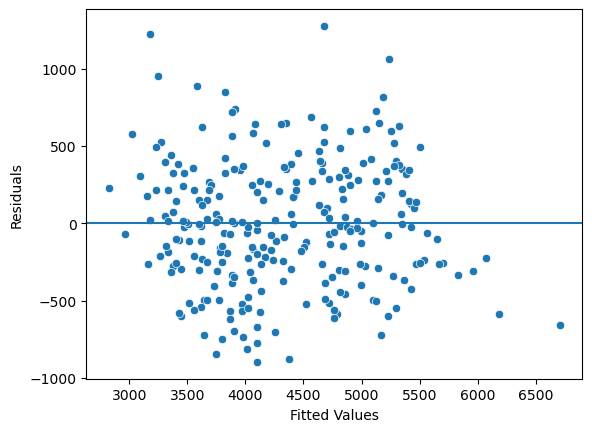

In [22]:
# check homoscedasticity assumptions by creating a scatter plot and see if the residuals are scattred randomly
fig = sns.scatterplot(x=fitted_values,y=residuals)
# add reference line at residuals = 0
fig.axhline(0)
fig.set_xlabel('Fitted Values')
fig.set_ylabel('Residuals')
plt.show()